In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import os

from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

In [2]:
# csv filename
station_name = 'FrayMarcos_Casupa'
# Percentage of missing data
max_pct_missing = 50
# Basin area
area_km2 = 690.20

In [3]:
# CSV folder
CSV_FOLDER = '..\..\..\Status_Outlook_Bulletin\stations\data'
CSV_FILE = os.path.join(CSV_FOLDER,station_name + '.csv')
print(CSV_FILE)

..\..\..\Status_Outlook_Bulletin\stations\data\FrayMarcos_Casupa.csv


In [4]:
# Read file
DISCHARGE_DAILY = pd.read_csv(CSV_FILE,parse_dates=['Fecha'],index_col="Fecha",dayfirst=True,na_values="NA")
# Identify the missing data
# DISCHARGE_DAILY_date_missing = pd.date_range(start = DISCHARGE_DAILY.index[0].strftime('%Y-%m-%d'), end = DISCHARGE_DAILY.index[-1].strftime('%Y-%m-%d'),freq='D')
# DISCHARGE_DAILY = DISCHARGE_DAILY.reindex(DISCHARGE_DAILY_date_missing,fill_value=None)
DISCHARGE_DAILY.index.name = 'Fecha' # Set index Fecha
DISCHARGE_DAILY.columns = ['Discharge']
## create column for day, month, year in the daily discharge ()
DISCHARGE_DAILY['year'] = DISCHARGE_DAILY.index.year
DISCHARGE_DAILY['month'] = DISCHARGE_DAILY.index.month
DISCHARGE_DAILY['monthday'] = DISCHARGE_DAILY.index.day_of_year
HTML(DISCHARGE_DAILY.tail(6).to_html())

,Discharge,year,month,monthday
Fecha,,,,
2025-05-01,6.828492,2025,5,121
2025-05-11,7.102699,2025,5,131
2025-05-21,8.701158,2025,5,141
2025-06-01,5.282550,2025,6,152
2025-06-11,19.140460,2025,6,162
2025-06-21,10.074430,2025,6,172


In [5]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=DISCHARGE_DAILY.index,    
    y=DISCHARGE_DAILY['Discharge'], 
    mode='lines+markers',               
    name='Streamflow (m3/s)'
))

fig.update_layout(
    title=f'Hydrograph',
    xaxis_title='Date',
    yaxis_title='Discharge (m³/s)'
)

fig.show()

In [6]:
DISCHARGE_DAILY['Discharge'].min()

0.3253076

In [7]:
DATA_DAILY = DISCHARGE_DAILY.dropna(subset=['Discharge'])
sorted_stage= DATA_DAILY['Discharge'].sort_values(ascending=False)
freq_stage = np.arange(1., len(sorted_stage) + 1) / len(sorted_stage)

df_freq = sorted_stage.to_frame(name='stage')
df_freq['frequency'] = freq_stage

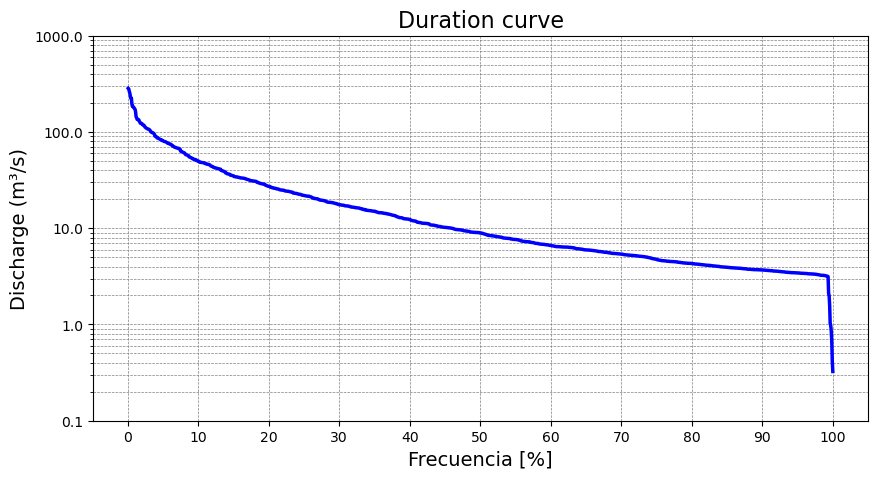

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
# Create the matplotlib plot with adjusted figure size
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(freq_stage * 100, sorted_stage, color='blue', linewidth=2.5)

ax.set_title('Duration curve', fontsize=16)
ax.set_xlabel('Frecuencia [%]', fontsize=14)
ax.set_ylabel('Discharge (m³/s)', fontsize=14)

# Set y-axis to log scale
ax.set_yscale('log')

# Set x and y-axis ticks and format
ax.set_xticks(np.arange(0, 101, 10))
ax.set_yticks([0.1, 1, 10, 100, 1000])
ax.get_yaxis().set_major_formatter(ScalarFormatter())

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')